## 1.1 Import Data
Download Data from https://analyse.kmi.open.ac.uk/open_dataset and save it to the same folder as this Jupyter Notebook. After this task was completed succesfully we'll import the Library Pandas, which helps to handle huge datasets more easily and performs vector operations with high speed.

In [1]:
import pandas as pd

studentRegistration = pd.read_csv(filepath_or_buffer='..//OULAD//studentRegistration.csv', sep=',')
assessments = pd.read_csv(filepath_or_buffer='..//OULAD//assessments.csv', sep=',')
courses = pd.read_csv(filepath_or_buffer='..//OULAD//courses.csv', sep=',')
studentAssessment = pd.read_csv(filepath_or_buffer='..//OULAD//studentAssessment.csv', sep=',')
studentRegistration = pd.read_csv(filepath_or_buffer='..//OULAD//studentRegistration.csv', sep=',')
studentVle = pd.read_csv(filepath_or_buffer='..//OULAD//studentVle.csv', sep=',')
vle = pd.read_csv(filepath_or_buffer='..//OULAD//vle.csv', sep=',')
studentInfo = pd.read_csv(filepath_or_buffer='..//OULAD//studentInfo.csv', sep=',')

After importing all tables succesfully into our Notebook, we can look into a dataframe typing DataFrame_name.head(n), where n is the number of lines shown. <br>


In [2]:
studentInfo.head(5)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [3]:
assessments.head(5)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [4]:
studentRegistration.head(5)

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [5]:
courses.head(5)

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [6]:
studentAssessment.head(5)

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [7]:
studentVle.head(5)

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [8]:
vle.head(5)

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


After we've explored our dataset a bit, we can start to make the first assumptions and the try to prove them with the dataset.

## 2.1 Can we find a link between the time of enrollement in a course and the final exam results?
<br>
To verify if there is a correlatation, we'll first need to prepare a dataframe, where every row represents a student, module combination with the two variables time of enrollement in days and final exam score.


In [9]:
# exam_assessments contains all final result where the assessment_type was an exam
exam_assessments = pd.merge(assessments, studentAssessment, on='id_assessment')
exam_assessments = exam_assessments[exam_assessments.assessment_type == 'Exam']
exam_assessments.head()



,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score
52923,CCC,2014B,24290,Exam,NaN,100.0,558914,230,0,32.0
52924,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0
52925,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0
52926,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0
52927,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0


In [10]:
exam_assessments_with_registration_date = pd.merge(exam_assessments, studentRegistration, \
                                                   on=['code_module', 'code_presentation', 'id_student'], \
                                                   how='inner')
exam_assessments_with_registration_date.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight,id_student,date_submitted,is_banked,score,date_registration,date_unregistration
0,CCC,2014B,24290,Exam,NaN,100.0,558914,230,0,32.0,-74.0,NaN
1,CCC,2014B,24290,Exam,NaN,100.0,559706,234,0,78.0,-22.0,NaN
2,CCC,2014B,24290,Exam,NaN,100.0,559770,230,0,54.0,-22.0,NaN
3,CCC,2014B,24290,Exam,NaN,100.0,560114,230,0,64.0,-281.0,NaN
4,CCC,2014B,24290,Exam,NaN,100.0,560311,234,0,100.0,-28.0,NaN


Now that we've successfully aggregated the cells we can investigate if there exists a correlation. With df.corr() we can calculate the Pearson product-moment correlation coefficient (PPMCC) which returns a value between -1 and +1. -1 Meaning total negative correlation, +1 total positive correlation and 0 no lineare correlation [cit].

In [11]:
from IPython.display import Math
Math(r'\rho(X,Y) = \frac{cov(X,Y)}{\sigma_X \cdot \sigma_Y} \\ cov \text{ is the covariance} \\ \sigma_Y \text{ is the standard derivation of } Y \\ \sigma_X \text{ is the standard derivation of } X')

<IPython.core.display.Math object>

In [12]:
exam_assessments_with_registration_date[['score', 'date_registration']].corr()

,score,date_registration
score,1.000000,0.024529
date_registration,0.024529,1.000000


From the dataframe above we can read that there is close to none correlation measurable, meaning that it's very likely that a prediction for exam results based on the time of enrolement won't be very successful.
With seaborn, a library for visualizations, we can print a scattered plot with a regression line that fits the data 
points best.

In [13]:
import seaborn as sns
sns.lmplot(x='date_registration',y='score',data=exam_assessments_with_registration_date,\
           fit_reg=True, line_kws={'color': 'red'}) 

As expected we don't get a clear picture for our prediction, because there seems to be no connection between the time of enrollement and exam results. But this is still helpfull beacause we know now that we don't have consider time of enrollement any more when it comes to predictions about the final exam.

## 2.2 Cause higher excercise points higher final grades?
Next we want to examine if the exercise points gattered by the students during the semester is a better method to predict the if a student will succeed a course.
First we'll create again a dataframe with the same key combination (id_student, code_module), but now with the new variables sore_exam and score_non_exam.

In [14]:
'''Is there a link between good scores in tests and good grades in exams?'''
# ohne Examen
non_exam_assessments = pd.merge(assessments, studentAssessment, on='id_assessment')
non_exam_assessments = non_exam_assessments[non_exam_assessments.assessment_type != 'Exam']
grouped_assessments = non_exam_assessments[['id_student', 'code_module', 'code_presentation', 'score']].groupby(['id_student', 'code_module', 'code_presentation']).sum().reset_index()

# mit Examen
exam_assessments = pd.merge(assessments, studentAssessment, on='id_assessment')
exam_assessments = exam_assessments[exam_assessments.assessment_type == 'Exam']
grouped_exam_assessments = exam_assessments[['id_student', 'code_module', 'code_presentation', 'score']].groupby(['id_student', 'code_module', 'code_presentation']).sum().reset_index()

assessment_eval = pd.merge(grouped_exam_assessments[['id_student', 'code_module', 'code_presentation', 'score']], grouped_assessments[['id_student', 'code_module', 'code_presentation', 'score']], on=['id_student', 'code_module', 'code_presentation'], suffixes=('_exam', '_non_exam'))
assessment_eval.head()


,id_student,code_module,code_presentation,score_exam,score_non_exam
0,23698,CCC,2014J,80.0,590.0
1,24213,DDD,2014B,58.0,476.0
2,27116,CCC,2014J,96.0,744.0
3,28046,DDD,2013J,40.0,306.0
4,28787,CCC,2014J,44.0,224.0


In [15]:
assessment_eval[['score_exam', 'score_non_exam']].corr()

,score_exam,score_non_exam
score_exam,1.000000,0.270082
score_non_exam,0.270082,1.000000


In the cell above we can see that the PPMCC is significantlly higher, which hints to that these two varaibles have a much higher significance than the ones in our test before. <br>
Now we will plot the scatter plot and vizualise the depencies of the variables.

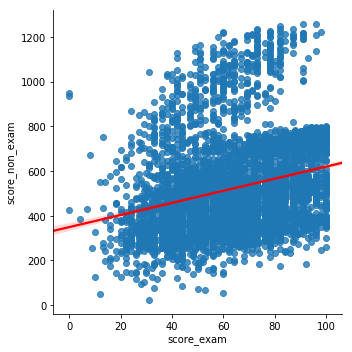

In [16]:
sns.lmplot(x='score_exam',y='score_non_exam',data=assessment_eval,fit_reg=True, line_kws={'color': 'red'}) 

After plotting we can confirm that there is also a visual correlation between excercise points and exam points. <br>
Now we can look into the different modules and explore if there is any difference. <br>
With 'assessment_eval.code_module.unique()' we get a list of the distinct code_modules over wich we'll itterate to get results from each module. First we'll take a look at the correlation matrix and then take a look into the scatter plot.

In [17]:
for code_module in assessment_eval.code_module.unique():
    print('Module: ' + code_module)
    print(assessment_eval[['score_exam', 'score_non_exam']][assessment_eval.code_module == code_module].corr())

Module: CCC
                score_exam  score_non_exam
score_exam         1.00000         0.51308
score_non_exam     0.51308         1.00000
Module: DDD
                score_exam  score_non_exam
score_exam        1.000000        0.134523
score_non_exam    0.134523        1.000000


In the output above we can see that the PPMCC diverges notably in the two modules.

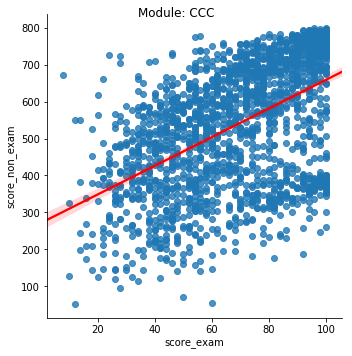

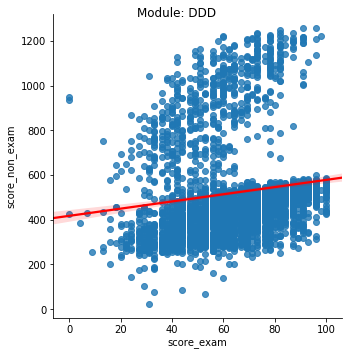

In [18]:
for code_module in assessment_eval.code_module.unique():
    scatter_plot = sns.lmplot(x='score_exam',y='score_non_exam', \
                              data=assessment_eval[assessment_eval.code_module==code_module],\
                              fit_reg=True, line_kws={'color': 'red'}) 
    fig = scatter_plot.fig
    fig.suptitle("Module: {}".format(code_module), fontsize=12)

As expected we see a different picture in the modules. This means that in CCC the excercises seem to have a much bigger impact on the final result than in DDD. We could now set up the theory that students who understood the excercises better can also transfer this knowledge to exam tasks, but we've to be careful with our findings because these results could also emerge from a policy were a percentage of the excercise points gets transformed into examen points.

## 2.3 Are there parallels between the students interactions with course materials and their understandings of the subject matter?
From the analysis above we could conclude that there is a strong correlation between excercise points and exam points. But why do certain students seem to have a better understanding of the excercises and are therfore better in the final exams, having a reduced rate of failing it. <br>
To investigate this circumstance we want to explore the click data of the students in the virtual learning environment and try to find groups that have a similar behavior. Ideally these groups will also have similarities in their mean excerice points or pass rate of the cluster. For building groups and classification tasks, K-means is very common alogrithm that helps to find clusters in a big data set. But when we look at the table VLE we see that that there are a lot of different variables which will result in a "number of days" x "number of students" matrix, which is to expensive to compute with K-means if we leave the matrix like it is. To reduce the matrix we can apply a method call principal componnent analysis.



In [45]:
vle_interactions = pd.merge(studentVle, vle[['id_site', 'code_module', 'code_presentation', 'activity_type']], on=['code_module', 'code_presentation', 'id_site'])

First we merge the two tables vle and studentVle, to connect the information of the vle with the click events from the students

In [46]:
vle_interactions.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,28400,546652,-10,4,forumng
1,AAA,2013J,28400,546652,-10,1,forumng
2,AAA,2013J,28400,546652,-10,1,forumng
3,AAA,2013J,28400,546652,-10,8,forumng
4,AAA,2013J,30268,546652,-10,3,forumng


In [47]:
interactions_agg_student_module_day = vle_interactions[['code_module', 'code_presentation', 'id_student', 'date', 'sum_click']].groupby(['code_module', 'code_presentation', 'id_student', 'date']).sum().reset_index()

Below is a table were we can see the aggregated click events were we have per module, presentaion, day and student just one row with the sum of the click events for this particular day.

In [48]:
interactions_agg_student_module_day.head()

,code_module,code_presentation,id_student,date,sum_click
0,AAA,2013J,11391,-5,98
1,AAA,2013J,11391,0,49
2,AAA,2013J,11391,1,127
3,AAA,2013J,11391,2,4
4,AAA,2013J,11391,6,3


Now we need to fill in the days where the students weren't active. If we would itterate with a for loop over the dataframe it would take quite some time to compute this simple operation, reason being the large table we've created. Thatswhy it's more efficient to merge on a dumm dataframe with all posible days and then fill all empty values with zero.

In [49]:
df_days = pd.DataFrame({'date': [day for day in range(-100,401)], 'dummy': 1})
df_unique_student_module_presentation = interactions_agg_student_module_day[['code_module', 'code_presentation', 'id_student']].drop_duplicates()
df_unique_student_module_presentation['dummy'] = 1
df_unique_student_module_presentation = pd.merge(df_days, df_unique_student_module_presentation, on='dummy', how='left')
del df_unique_student_module_presentation['dummy']
df_unique_student_module_presentation.ffill()
df_unique_student_module_presentation = pd.merge(df_unique_student_module_presentation, interactions_agg_student_module_day,\
                                                on=['code_module', 'code_presentation', 'id_student', 'date'], how='left')
df_unique_student_module_presentation['sum_click'] = df_unique_student_module_presentation['sum_click'].fillna(0)

Since not all modules have the same presentation length, we need to cut off the dummy days that are not between start and end of the module

In [50]:
for module in df_unique_student_module_presentation.code_module.unique():
    for presentation in df_unique_student_module_presentation[df_unique_student_module_presentation.code_module == module].code_presentation.unique():
        min_date = interactions_agg_student_module_day[(interactions_agg_student_module_day.code_presentation == presentation) & \
                                                        (interactions_agg_student_module_day.code_module == module)]['date'].min()
        max_date = interactions_agg_student_module_day[(interactions_agg_student_module_day.code_presentation == presentation) & \
                                                        (interactions_agg_student_module_day.code_module == module)]['date'].max()
        df_unique_student_module_presentation = df_unique_student_module_presentation[~((df_unique_student_module_presentation.code_module == module) & \
                                                                                     (df_unique_student_module_presentation.code_presentation == presentation) &\
                                                                                     ((df_unique_student_module_presentation.date < min_date) | \
                                                                                     (df_unique_student_module_presentation.date > max_date)))]

In [51]:
df_unique_student_module_presentation.head()

,date,code_module,code_presentation,id_student,sum_click
2207538,-25,DDD,2014J,8462,0.0
2207539,-25,DDD,2014J,25572,0.0
2207540,-25,DDD,2014J,27417,0.0
2207541,-25,DDD,2014J,33681,29.0
2207542,-25,DDD,2014J,33796,0.0


In the cell below we can choose now the module and presentation (when the module started) we want to examine.

In [52]:
module = 'CCC'
presentation = '2014J'

After we have prepared our dataset and selected module and presentation, we can pivot it to form it to it's final form, for the principal component analysis (PCA) and K-means.

In [53]:
studentvle_pivot = df_unique_student_module_presentation[(df_unique_student_module_presentation.code_module == module) & (df_unique_student_module_presentation.code_presentation == presentation)]
studentvle_pivot = studentvle_pivot[['date', 'id_student', 'sum_click']].pivot(index='id_student', columns='date', values='sum_click')
studentvle_pivot.head()

date,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,...,260,261,262,263,264,265,266,267,268,269
id_student,,,,,,,,,,,,,,,,,,,,,
23698,4.0,0.0,0.0,0.0,1.0,6.0,0.0,2.0,0.0,77.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25261,30.0,10.0,8.0,4.0,0.0,0.0,1.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27116,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,3.0
28787,0.0,5.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0
28952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After pivoting we'll preform the prinipal component analysis to reduce the datarame from 2302 x 288 to 2302 x 5

In [54]:
from sklearn.decomposition import PCA

n_components = 5
pca = PCA(n_components)
pca.fit(studentvle_pivot)

studentvle_pca = pd.DataFrame(pca.transform(studentvle_pivot), columns=['PCA%i' % i for i in range(n_components)], index=studentvle_pivot.index)

In [55]:
studentvle_pca.head()

,PCA0,PCA1,PCA2,PCA3,PCA4
id_student,,,,,
23698,-26.487351,-3.107359,4.325598,-13.752922,-15.046347
25261,-26.048528,1.657788,18.558229,-48.725436,-33.931624
27116,30.375342,-8.535840,11.407199,-18.994369,-27.449902
28787,-43.647153,-4.473031,-1.291802,-11.676443,20.583185
28952,-79.481406,1.407084,0.503307,-5.852500,22.684371


On this reduced dataframe we can now apllie the K-Means algoritm to find the optimal number of clusters and to devide the students into them based on their online behavior.

In [56]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = studentvle_pca
distorsions = []
for k in range(2, 50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)



After calculating the squared errors for each number of clusters between 2 and 50 we can plot in the cell below the elbow curve. As we can see below, with every cluster we add the error gets smaller, but the decline of the curve gets flatter with every added cluster. In the plot below we can read the inflection point, which lies somewhere around 8. This means that 8 clusters are best to devide our dataset in cluster with the optimal balance between squared error and number of clusters.

Text(0.5, 1.0, 'Elbow curve')

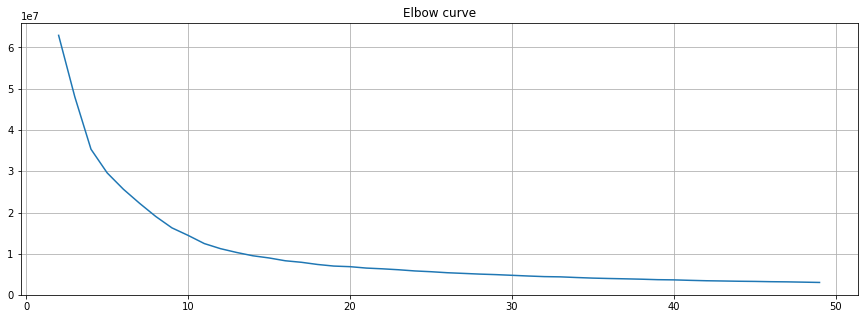

In [57]:
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 50), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [68]:
import numpy as np
n_cluster = 8
km = KMeans(n_cluster).fit(studentvle_pca)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = studentvle_pca.index.values
cluster_map['cluster'] = km.labels_

cluster_map = pd.merge(cluster_map, assessment_eval[(assessment_eval.code_module == module) & (assessment_eval.code_presentation == presentation)], left_on= 'data_index', right_on='id_student')
cluster_map['passed'] = np.where(cluster_map.score_exam >= 40, 1, 0)


After grouping the data into the cluster we can start to look into the clusters and examine if clustering by the online activities resulted in clusters that also have other similarities.

In [69]:
results = pd.DataFrame()

for cluster in range(0,n_cluster):
    ev = list()
    data_tmp = cluster_map[cluster_map.cluster == cluster]
    results.loc['size', cluster] = len(data_tmp)
    results.loc['rel_size', cluster] = len(data_tmp)/len(cluster_map)
    results.loc['mean_score_exam', cluster] = data_tmp.score_exam.mean()
    results.loc['mean_score_excercise', cluster] = data_tmp.score_non_exam.mean()
    results.loc['overall_mean_score_exam', cluster] = cluster_map.score_exam.mean()
    results.loc['mean_score_non_exam', cluster] = data_tmp.score_non_exam.mean()
    results.loc['overall_mean_score_non_exam', cluster] = cluster_map.score_non_exam.mean()
    results.loc['pass_rate', cluster] = data_tmp.passed.mean()
    results.loc['overall_pass_rate', cluster] = cluster_map.passed.mean()
    results.loc['rel_derivation_from_mean_exam_score', cluster] = (data_tmp.score_exam.mean() - cluster_map.score_exam.mean()) * 100 / data_tmp.score_exam.max()
    results.loc['rel_derivation_from_mean_excercise_score', cluster] = (data_tmp.score_non_exam.mean() - cluster_map.score_non_exam.mean()) * 100 / data_tmp.score_non_exam.max()
    results.loc['rel_derivation_from_mean_pass_rate', cluster] = (data_tmp.passed.mean() - cluster_map.passed.mean()) *100

The cluster sizes are quite unequal distributed, ranging from one up to 618 students. Also big differences in mean exam score and mean excercise score between the clusters show up, as well as differing pass rates. We can coclude from our findins that just with the number of actions per student per day we were able to find clusters of high performing students as well as students that might need further assistance to succede in their academic career.

In [70]:
results

,0,1,2,3,4,5,6,7
size,622.000000,95.000000,1.000000,246.000000,197.000000,1.000000,1.000000,5.000000
rel_size,0.532534,0.081336,0.000856,0.210616,0.168664,0.000856,0.000856,0.004281
mean_score_exam,66.401929,75.810526,64.000000,76.406504,60.192893,44.000000,40.000000,78.400000
mean_score_excercise,529.167203,633.252632,489.000000,609.349593,488.253807,364.000000,225.000000,603.400000
overall_mean_score_exam,68.234589,68.234589,68.234589,68.234589,68.234589,68.234589,68.234589,68.234589
mean_score_non_exam,529.167203,633.252632,489.000000,609.349593,488.253807,364.000000,225.000000,603.400000
overall_mean_score_non_exam,547.501712,547.501712,547.501712,547.501712,547.501712,547.501712,547.501712,547.501712
pass_rate,0.852090,0.957895,1.000000,0.939024,0.807107,1.000000,1.000000,1.000000
overall_pass_rate,0.872432,0.872432,0.872432,0.872432,0.872432,0.872432,0.872432,0.872432
rel_derivation_from_mean_exam_score,-1.832660,7.575937,-6.616545,8.171915,-8.041696,-55.078611,-70.586473,10.372868


In [73]:
results = results.loc[:, results.loc["size"] > 5]

To further examine the cluster we drop the clusters having less than 5 students, as they are representing outliers, which leaves us with 5 clusters.

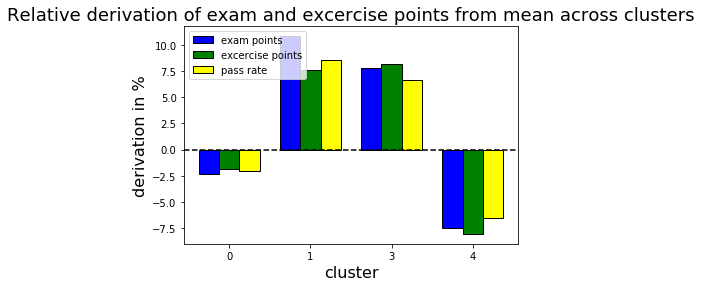

In [74]:
cluster=results.columns
assesment=['exam points','excercise points', 'pass rate']
pos = np.arange(len(cluster))
bar_width = 0.25
derivation_from_mean_excercise_score=list(results.loc['rel_derivation_from_mean_excercise_score'])
derivation_from_mean_exam_score=list(results.loc['rel_derivation_from_mean_exam_score'])
pass_derivation=list(results.loc['rel_derivation_from_mean_pass_rate'])
 
plt.bar(pos,derivation_from_mean_excercise_score,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,derivation_from_mean_exam_score,bar_width,color='green',edgecolor='black')
plt.bar(pos+(bar_width*2),pass_derivation,bar_width,color='yellow',edgecolor='black')
plt.xticks(pos+bar_width, cluster)
plt.xlabel('cluster', fontsize=16)
plt.ylabel('derivation in %', fontsize=16)
plt.title('Relative derivation of exam and excercise points from mean across clusters',fontsize=18)
plt.legend(assesment,loc=2)
plt.axhline(0, color='black', linestyle='--')
plt.show()

Above we can see a bar chart that shows the relative derivation from the mean for exam points, excercise points and pass rate for the different clusters. The first thing to notice is that 3 clusters are well above average, one being close to average and one well below average. The two clusters below average, represent also the fast majority of students (around 70%). To get a better understanding of the clusters we examine the click rates that led to them.

In [76]:
cluster_activity = pd.DataFrame()
for cluster in results.columns:
    tmp_df = pd.merge(cluster_map[cluster_map.cluster == cluster],
                      vle_interactions, 
                      on=['id_student', 'code_module', 'code_presentation'])
    activities = tmp_df['activity_type'].value_counts()

    for i in activities.index:
        cluster_activity.loc[i, cluster] = activities[i]/results.loc['size'][cluster]
    #cluster_activity.loc['sum', cluster] = cluster_activity[cluster].sum()

In [77]:
results.columns

Int64Index([0, 1, 3, 4], dtype='int64')

In [78]:
cluster_activity

,0,1,3,4
quiz,68.210611,252.610526,195.626016,100.401015
homepage,65.889068,123.431579,138.560976,77.395939
subpage,56.041801,112.884211,115.414634,79.248731
resource,49.628617,82.378947,96.593496,63.187817
forumng,34.527331,208.147368,244.369919,58.949239
oucontent,24.630225,71.147368,73.052846,42.385787
url,6.159164,13.505263,14.252033,7.928934
oucollaborate,1.612540,3.589474,5.390244,3.467005
page,1.260450,2.221053,2.304878,1.604061


In the table above we've splitted the total clicks of each cluster into the 9 types of content that were available in this module. To visualize this table best we make a heatmap for each cluster to see more easily were students in their clusters spent their clicks relative to other content. <br>
Below we can see that the above average clusters number 0, 4 and 6 spent the majority of their clicks on forumng and quiz.

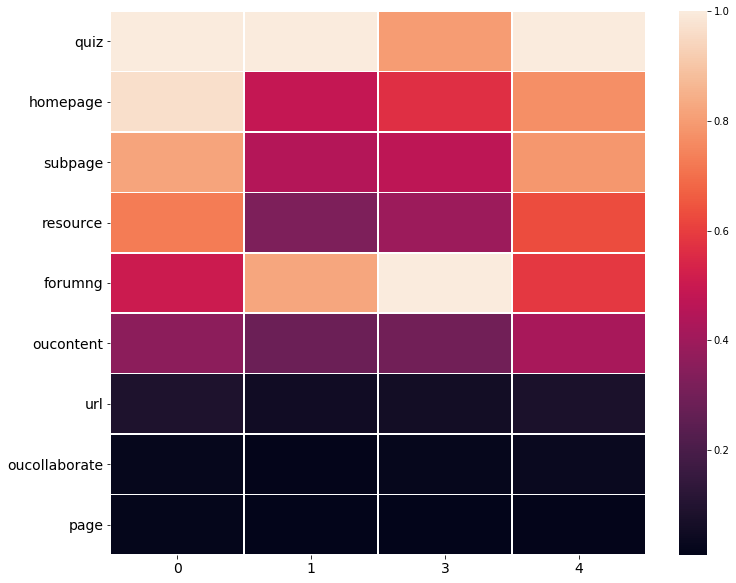

In [79]:
#cluster_activity = cluster_activity.T
ax = sns.heatmap(cluster_activity.div(cluster_activity.max(axis=0), axis=1), linewidths=.5 ,robust=True ,annot_kws = {'size':14})
ax.tick_params(labelsize=14)
ax.figure.set_size_inches((12, 10))

After exploring the distribution of clicks in clusters on content we want to get to know more about how clicks where spent during the semester. To visualize the clicks per day we display the clicks on a barchart were every bar represents one bar.

In [80]:
activity_per_cluster = list()
for cluster in range(n_cluster):
     activity_per_cluster.append(pd.merge(cluster_map[cluster_map.cluster==cluster]['id_student'], 
         studentvle_pivot,
         on=['id_student']).sum())

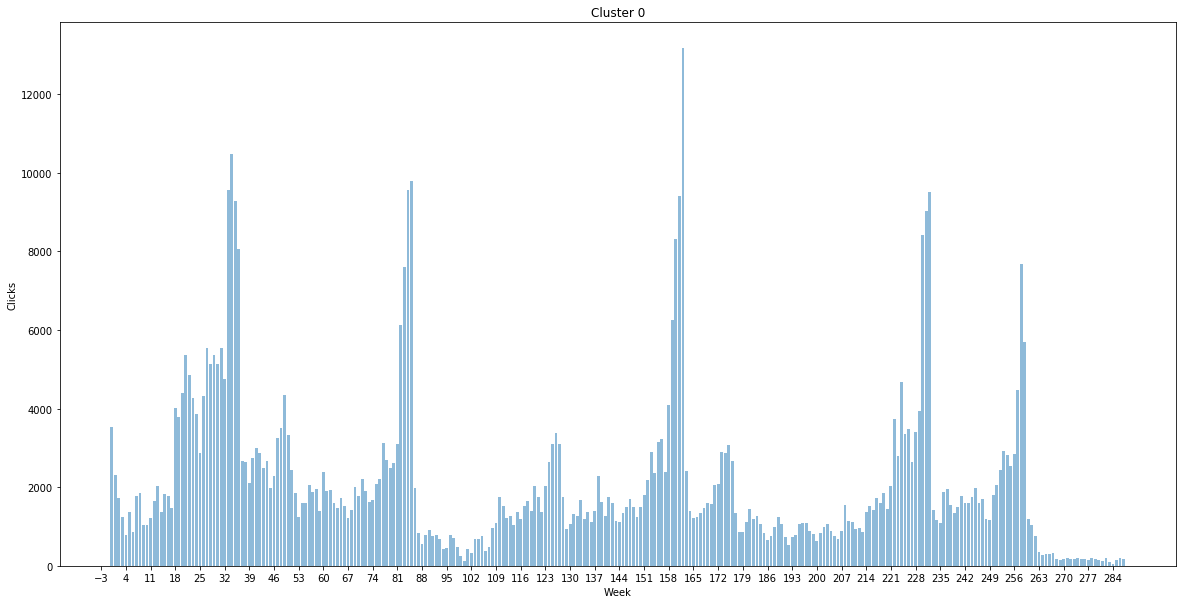

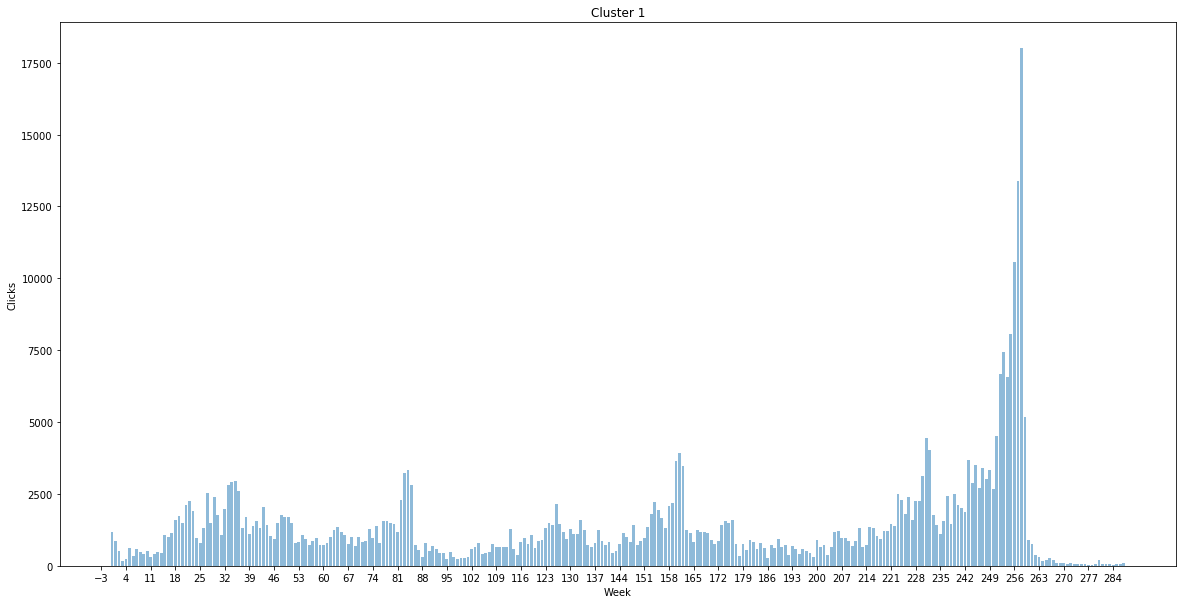

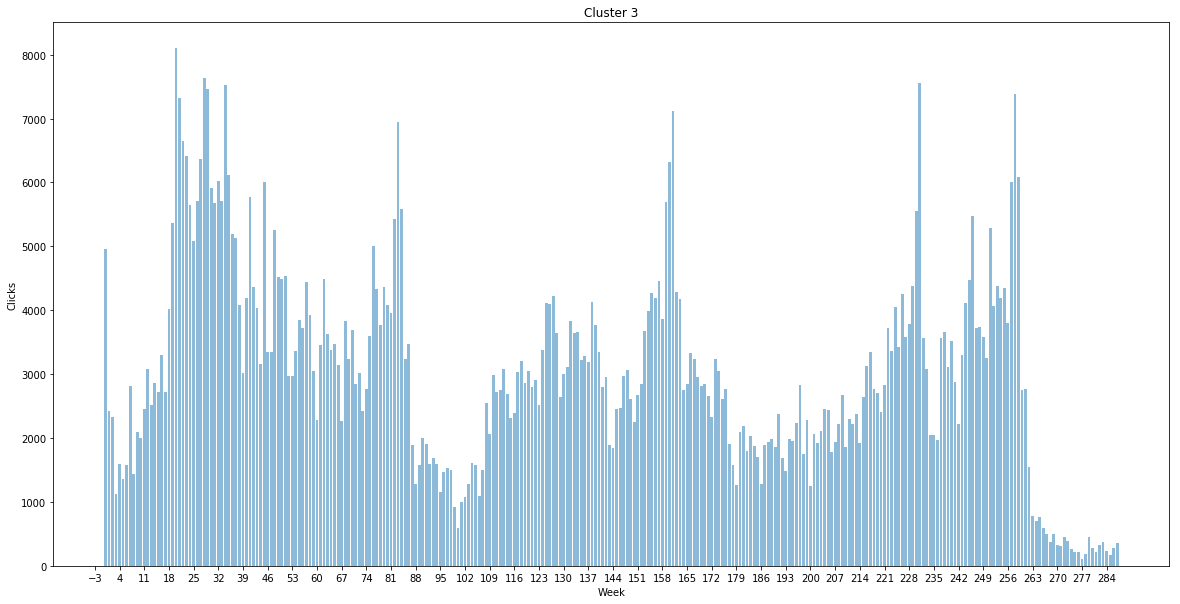

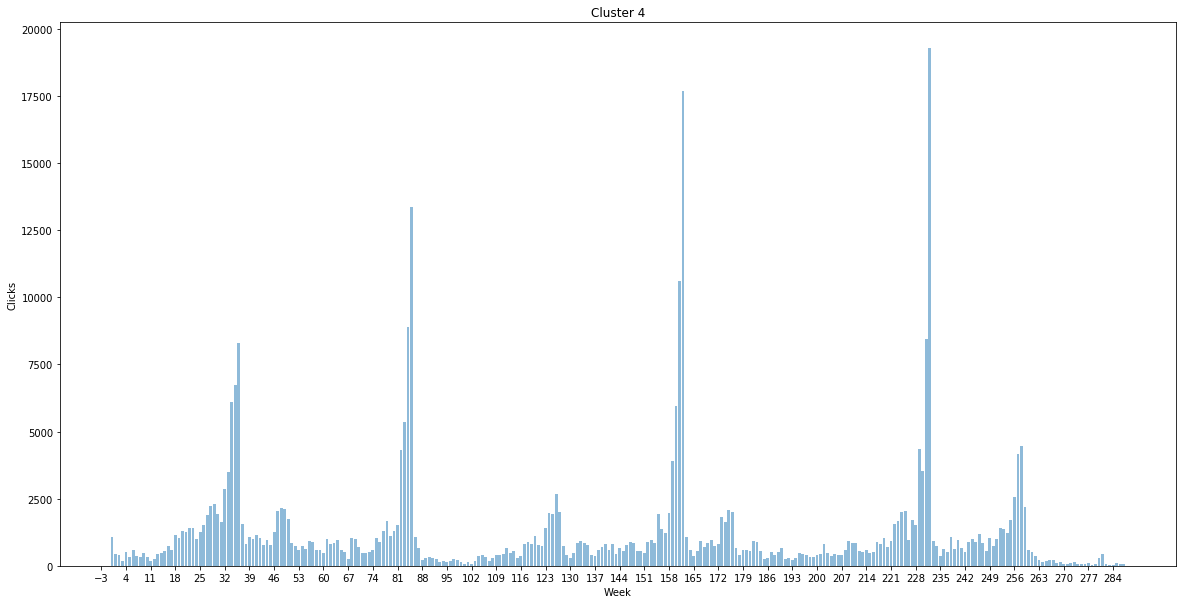

In [81]:
for cluster, activity in enumerate(activity_per_cluster):
    if cluster in results.columns:
        objects = range(len(activity[1:]))
        y_pos = np.arange(len(objects))
        performance = activity[1:]
        plt.figure(figsize=(20,10))
        plt.bar(y_pos, performance, align='center', alpha=0.5)
        plt.xticks(range(studentvle_pivot.columns.min() // 7,len(activity[1:])-(studentvle_pivot.columns // 7).min(),7))
        plt.ylabel('Clicks')
        plt.xlabel('Week')
        plt.title('Cluster ' + str(cluster))

plt.show()
        
        

In [42]:
studentvle_pivot.columns.min()

-18

In [43]:
a = pd.merge(cluster_map[cluster_map.cluster==7]['id_student'], 
         studentvle_pivot,
         on=['id_student'])
#results.loc[:, results.loc["size"] >= 5]
b = a.iloc[:, 158:163]

In [44]:
b

,139,140,141,142,143
0,0.0,24.0,1.0,88.0,48.0
1,0.0,150.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,37.0
3,26.0,0.0,13.0,64.0,60.0
4,122.0,71.0,75.0,30.0,1.0
5,0.0,15.0,24.0,106.0,171.0
6,0.0,0.0,0.0,0.0,46.0
7,4.0,0.0,0.0,20.0,96.0
8,21.0,1.0,44.0,0.0,39.0
9,15.0,4.0,17.0,8.0,13.0
